# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ionosphere_data.csv")
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
df1 =df['label']
df1.value_counts()

g    225
b    126
Name: label, dtype: int64

In [7]:
df.sample(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
138,1,0,-0.26667,0.40000,-0.27303,0.12159,-0.17778,-0.04444,0.06192,-0.06879,0.04461,0.02575,-0.00885,0.02726,-0.01586,-0.00166,-0.00093,-0.00883,0.00470,-0.00153,0.00138,0.00238,-0.00114,0.00102,-0.00069,-0.00050,0.00019,-0.00043,0.00026,0.00005,0.00000,0.00015,-0.00008,0.00002,b
141,1,0,0.95202,0.02254,0.93757,-0.01272,0.93526,0.01214,0.96705,-0.01734,0.96936,0.00520,0.95665,-0.03064,0.95260,-0.00405,0.99480,-0.02659,0.99769,0.01792,0.93584,-0.04971,0.93815,-0.02370,0.97052,-0.04451,0.96215,-0.01647,0.97399,0.01908,0.95434,-0.03410,0.95838,0.00809,g
43,1,0,-0.64286,-1.00000,1.00000,0.82857,1.00000,-1.00000,1.00000,-0.23393,1.00000,0.96161,1.00000,-0.37679,1.00000,-1.00000,1.00000,0.13839,1.00000,-1.00000,1.00000,-0.03393,-0.84286,1.00000,0.53750,0.85714,1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,b


In [8]:
df.drop_duplicates()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [9]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data=df.iloc[:,:-1]
label=df.iloc[:,-1]

In [14]:
label = df["label"].map({'g':1,'b':0})

In [15]:
X_train=data.sample(frac=0.6,random_state=1)
X_test=data.sample(frac=0.4,random_state=1)
y_train=label.sample(frac=0.6,random_state=1)
y_test=label.sample(frac=0.4,random_state=1)

In [16]:
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")

In [19]:
from keras import models, layers , optimizers ,regularizers,losses
network=models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(X_train.shape[1],)))
#network.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.0001),activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [20]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                560       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = network.fit(X_train,y_train,epochs=50,batch_size=1,verbose=1)

Epoch 1/50
211/211 [==============================] - 1s 909us/step - loss: 0.6116 - accuracy: 0.6391
Epoch 2/50
211/211 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.7284
Epoch 3/50
211/211 [==============================] - 0s 1000us/step - loss: 0.5071 - accuracy: 0.7390
Epoch 4/50
211/211 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8367
Epoch 5/50
211/211 [==============================] - 0s 937us/step - loss: 0.3447 - accuracy: 0.8773
Epoch 6/50
211/211 [==============================] - 0s 948us/step - loss: 0.3875 - accuracy: 0.8523
Epoch 7/50
211/211 [==============================] - 0s 934us/step - loss: 0.3094 - accuracy: 0.9108
Epoch 8/50
211/211 [==============================] - 0s 953us/step - loss: 0.2252 - accuracy: 0.9432
Epoch 9/50
211/211 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9230
Epoch 10/50
211/211 [==============================] - 0s 1ms/step - loss: 0.2250 - acc

In [22]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

In [23]:
loss_acc=pd.DataFrame(history.history)
loss_acc.tail().T

,45,46,47,48,49
loss,0.083789,0.078540,0.091836,0.083281,0.088043
accuracy,0.971564,0.971564,0.971564,0.971564,0.971564


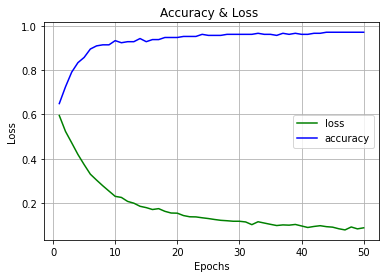

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'g', label='loss')
plt.plot(epochs, accuracy_values, 'b', label='accuracy')
plt.title('Accuracy & Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [25]:
network.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9786


[0.05469227954745293, 0.9785714149475098]

In [26]:
pred=network.predict(X_test)
pred.flatten().astype("U8")

array(['0.001641', '0.996845', '3.409784', '0.999964', '0.912462',
       '0.998962', '0.999908', '0.966150', '0.001256', '0.067901',
       '0.997336', '0.998842', '0.008459', '0.995558', '2.382278',
       '0.005022', '0.782980', '0.010394', '0.986942', '1.612052',
       '0.588261', '0.969164', '0.996580', '0.874946', '1.042015',
       '0.999940', '0.989549', '0.997946', '0.947933', '0.99809',
       '0.003522', '0.998644', '0.004358', '0.042516', '0.995474',
       '0.999819', '0.021121', '8.167495', '0.997975', '0.999726',
       '0.979254', '0.998171', '0.986776', '0.997150', '0.999017',
       '0.914741', '0.997382', '0.993370', '0.027941', '0.998852',
       '0.937614', '0.999970', '0.026201', '0.005129', '0.999976',
       '0.991486', '0.001555', '9.267256', '0.000268', '0.998072',
       '0.996282', '0.001962', '0.998958', '0.002226', '9.932602',
       '0.999198', '7.818599', '0.999489', '0.996539', '5.714471',
       '0.997486', '0.003556', '0.000361', '0.998394', '0.00892